<a href="https://colab.research.google.com/github/ywtd387e/lab_exp3/blob/main/factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install factor_analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 870.4 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 39.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=6b5fb9c2c4c72a030706f1ebad99924f4abdf8bfc9bbb9be37bdd44174314025
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("bfi.csv")
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
df.drop(['gender', 'education', 'age'],axis=1,inplace=True)

In [6]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

In [7]:
df.dropna(inplace=True)

In [8]:
df.info

<bound method DataFrame.info of        A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N1   N2   N3  \
0     2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  4.0  ...  3.0  4.0  2.0   
1     2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  4.0  ...  3.0  3.0  3.0   
2     5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  5.0  ...  4.0  5.0  4.0   
3     4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...  2.0  5.0  2.0   
4     2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  2.0  ...  2.0  3.0  4.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2793  3.0  4.0  3.0  1.0  3.0  5.0  4.0  5.0  3.0  4.0  ...  5.0  6.0  5.0   
2794  5.0  5.0  5.0  5.0  3.0  5.0  4.0  2.0  3.0  5.0  ...  4.0  5.0  3.0   
2797  2.0  3.0  5.0  2.0  5.0  5.0  5.0  5.0  1.0  1.0  ...  3.0  4.0  3.0   
2798  5.0  2.0  2.0  4.0  4.0  5.0  5.0  5.0  2.0  6.0  ...  5.0  5.0  6.0   
2799  2.0  3.0  1.0  4.0  2.0  5.0  5.0  3.0  3.0  3.0  ...  1.0  2.0  2.0   

       N4   N5   O1  O2   O3   

In [9]:
df.head

<bound method NDFrame.head of        A1   A2   A3   A4   A5   C1   C2   C3   C4   C5  ...   N1   N2   N3  \
0     2.0  4.0  3.0  4.0  4.0  2.0  3.0  3.0  4.0  4.0  ...  3.0  4.0  2.0   
1     2.0  4.0  5.0  2.0  5.0  5.0  4.0  4.0  3.0  4.0  ...  3.0  3.0  3.0   
2     5.0  4.0  5.0  4.0  4.0  4.0  5.0  4.0  2.0  5.0  ...  4.0  5.0  4.0   
3     4.0  4.0  6.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...  2.0  5.0  2.0   
4     2.0  3.0  3.0  4.0  5.0  4.0  4.0  5.0  3.0  2.0  ...  2.0  3.0  4.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2793  3.0  4.0  3.0  1.0  3.0  5.0  4.0  5.0  3.0  4.0  ...  5.0  6.0  5.0   
2794  5.0  5.0  5.0  5.0  3.0  5.0  4.0  2.0  3.0  5.0  ...  4.0  5.0  3.0   
2797  2.0  3.0  5.0  2.0  5.0  5.0  5.0  5.0  1.0  1.0  ...  3.0  4.0  3.0   
2798  5.0  2.0  2.0  4.0  4.0  5.0  5.0  5.0  2.0  6.0  ...  5.0  5.0  6.0   
2799  2.0  3.0  1.0  4.0  2.0  5.0  5.0  3.0  3.0  3.0  ...  1.0  2.0  2.0   

       N4   N5   O1  O2   O3   O4

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577235022, 0.0)

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468395

In [15]:
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()

ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

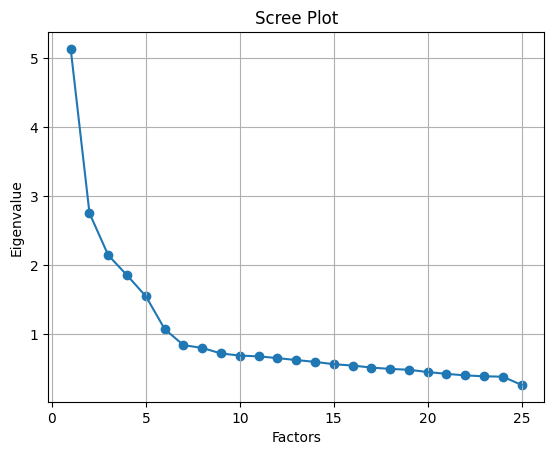

In [16]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [17]:

fa = FactorAnalyzer(n_factors=6, rotation='varimax')
fa.fit(df)
loadings = fa.loadings_
loadings

array([[ 9.52197422e-02,  4.07831574e-02,  4.87338848e-02,
        -5.30987348e-01, -1.13057329e-01,  1.61216352e-01],
       [ 3.31312760e-02,  2.35538040e-01,  1.33714395e-01,
         6.61140975e-01,  6.37337870e-02, -6.24353610e-03],
       [-9.62088411e-03,  3.43008174e-01,  1.21353367e-01,
         6.05932693e-01,  3.39902653e-02,  1.60106427e-01],
       [-8.15175586e-02,  2.19716721e-01,  2.35139532e-01,
         4.04594039e-01, -1.25338019e-01,  8.63557029e-02],
       [-1.49615885e-01,  4.14457674e-01,  1.06382165e-01,
         4.69698291e-01,  3.09765725e-02,  2.36519342e-01],
       [-4.35840215e-03,  7.72477524e-02,  5.54582255e-01,
         7.51069590e-03,  1.90123729e-01,  9.50350462e-02],
       [ 6.83300836e-02,  3.83703840e-02,  6.74545450e-01,
         5.70549876e-02,  8.75925912e-02,  1.52775079e-01],
       [-3.99936734e-02,  3.18673007e-02,  5.51164438e-01,
         1.01282240e-01, -1.13380871e-02,  8.99628355e-03],
       [ 2.16283366e-01, -6.62407738e-02, -6.384

In [18]:
fa = FactorAnalyzer(5,rotation="varimax")
fa.fit(df)
fa.loadings_

array([[ 0.11112641,  0.04046493,  0.02279796, -0.42816554, -0.07793074],
       [ 0.029588  ,  0.21371606,  0.13903739,  0.62694553,  0.06213921],
       [ 0.00935691,  0.31784809,  0.10933115,  0.65074261,  0.05619584],
       [-0.06647574,  0.20456624,  0.23058374,  0.43562383, -0.1127004 ],
       [-0.12211317,  0.39303367,  0.0878692 ,  0.53708686,  0.0667076 ],
       [ 0.01041556,  0.07018423,  0.54582379,  0.03887794,  0.20958365],
       [ 0.08957412,  0.0332704 ,  0.64873118,  0.10278247,  0.11543389],
       [-0.03085502,  0.02390651,  0.55703585,  0.11157762, -0.00518271],
       [ 0.24041008, -0.0649837 , -0.63380555, -0.03749823, -0.107535  ],
       [ 0.29031777, -0.1763948 , -0.56246672, -0.04752477,  0.03682235],
       [ 0.04281888, -0.5748346 ,  0.03314352, -0.10481258, -0.05879528],
       [ 0.24474268, -0.67873071, -0.10248265, -0.11251716, -0.04200997],
       [ 0.02418041,  0.53681627,  0.08301031,  0.2579065 ,  0.28087734],
       [-0.11561383,  0.64683266,  0.1

In [19]:
fa.get_factor_variance()


(array([2.70963262, 2.47308983, 2.04110564, 1.844498  , 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))